In [5]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [6]:
# necessity items

necessities = pd.read_csv('Resources/necessityitems_consumption_15_20.csv')
necessities

,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Gasoline and other motor fuel,409147,409566,410240,413904,414094,414063,417522,416371,420458,...,403003,414196,412515,348239,258098,312138,352503,363811,369140,374007
1,Lubricants and fluids,7997,7750,7627,7552,7361,7284,7222,7093,7110,...,7358,7555,7541,6383,4743,5721,6446,6656,6742,6831
2,Fuel oil,28549,33918,27675,26561,25071,25363,25709,26083,26810,...,21250,19725,21692,23366,27167,30496,27746,26913,26182,28497
3,Other fuels,1973,2344,2053,1845,1782,1809,1796,1730,1736,...,1497,1428,1438,1347,1361,1418,1388,1398,1425,1479
4,Prescription drugs,338316,335646,338817,339516,342481,344160,347730,350601,350147,...,393525,397892,404197,429613,392311,396323,404648,408873,412429,417457
5,Nonprescription drugs,63661,63165,64196,63846,63865,65068,65258,65426,66007,...,77449,78626,79126,85388,76229,79927,82875,85731,84330,84740
6,Other medical products,5257,5249,5271,5258,5237,5335,5434,5475,5381,...,6523,6612,6614,6215,5233,5800,6284,6791,6945,7151
7,Household cleaning products,36698,36301,36282,35978,36021,36172,36323,36534,36737,...,39571,39791,40017,46227,40557,42437,42594,41637,41494,41810
8,Household paper products,36414,36067,36221,35835,36243,36405,36509,36564,36781,...,37652,38042,37937,44706,37601,39052,39452,37998,37965,39656
9,Household linens,41471,41486,42591,42450,42927,42092,42803,43223,43234,...,56232,53555,52812,50236,42161,51225,54864,56319,56326,56894


In [7]:
consumption15_consumption_19 = necessities[['Consumption Category ', '2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10',
       '2015M11', '2015M12', '2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10',
       '2016M11', '2016M12', '2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10',
       '2017M11', '2017M12', '2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10',
       '2018M11', '2018M12', '2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10',
       '2019M11', '2019M12']]

consumption15_consumption_19 = consumption15_consumption_19.set_index('Consumption Category ')
consumption15_consumption_19

,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,2015M10,...,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12
Consumption Category,,,,,,,,,,,,,,,,,,,,,
Gasoline and other motor fuel,409147,409566,410240,413904,414094,414063,417522,416371,420458,416831,...,411127,419375,411998,413314,410698,417331,411279,417060,411946,403003
Lubricants and fluids,7997,7750,7627,7552,7361,7284,7222,7093,7110,7008,...,7545,7660,7535,7555,7506,7612,7489,7564,7541,7358
Fuel oil,28549,33918,27675,26561,25071,25363,25709,26083,26810,26608,...,24371,23015,22774,23604,23258,23221,22515,22061,23684,21250
Other fuels,1973,2344,2053,1845,1782,1809,1796,1730,1736,1662,...,1677,1610,1589,1638,1621,1618,1587,1565,1699,1497
Prescription drugs,338316,335646,338817,339516,342481,344160,347730,350601,350147,353385,...,386897,381678,386486,390877,392962,396058,397687,394365,395888,393525
Nonprescription drugs,63661,63165,64196,63846,63865,65068,65258,65426,66007,65706,...,76869,76924,77264,77546,77802,76594,77062,77640,76750,77449
Other medical products,5257,5249,5271,5258,5237,5335,5434,5475,5381,5489,...,6504,6409,6423,6428,6545,6531,6584,6565,6495,6523
Household cleaning products,36698,36301,36282,35978,36021,36172,36323,36534,36737,36618,...,39233,39404,39403,39517,39833,39976,39676,39837,39746,39571
Household paper products,36414,36067,36221,35835,36243,36405,36509,36564,36781,36539,...,37969,38330,38133,38033,38614,38772,38374,38328,37732,37652


In [25]:
necessities15 = necessities.loc[:, ['Consumption Category ', '2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10','2015M11', '2015M12']]
totalNecessities15 = necessities15.sum(axis=1)
necessities15['Total'] = totalNecessities15
necessities15 

necessities16 = necessities.loc[:, ['Consumption Category ', '2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10','2016M11', '2016M12']]
totalNecessities16 = necessities16.sum(axis=1)
necessities16['Total'] = totalNecessities16
necessities16

necessities17 = necessities.loc[:, ['Consumption Category ', '2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10','2017M11', '2017M12']]
totalNecessities17 = necessities17.sum(axis=1)
necessities17['Total'] = totalNecessities17
necessities17

necessities18 = necessities.loc[:, ['Consumption Category ', '2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10','2018M11', '2018M12']]
totalNecessities18 = necessities18.sum(axis=1)
necessities18['Total'] = totalNecessities18
necessities18

necessities19 = necessities.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10','2019M11', '2019M12']]
totalNecessities19 = necessities19.sum(axis=1)
necessities19['Total'] = totalNecessities19
necessities19

necessities15
necessities16
necessities17
necessities18
necessities19

,Consumption Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,Total
0,Gasoline and other motor fuel,416232,413890,411127,419375,411998,413314,410698,417331,411279,417060,411946,403003,4957253
1,Lubricants and fluids,7617,7591,7545,7660,7535,7555,7506,7612,7489,7564,7541,7358,90573
2,Fuel oil,24220,23751,24371,23015,22774,23604,23258,23221,22515,22061,23684,21250,277724
3,Other fuels,1614,1628,1677,1610,1589,1638,1621,1618,1587,1565,1699,1497,19343
4,Prescription drugs,376230,383557,386897,381678,386486,390877,392962,396058,397687,394365,395888,393525,4676210
5,Nonprescription drugs,76356,76578,76869,76924,77264,77546,77802,76594,77062,77640,76750,77449,924834
6,Other medical products,6348,6393,6504,6409,6423,6428,6545,6531,6584,6565,6495,6523,77748
7,Household cleaning products,39808,39000,39233,39404,39403,39517,39833,39976,39676,39837,39746,39571,475004
8,Household paper products,38486,38043,37969,38330,38133,38033,38614,38772,38374,38328,37732,37652,458466
9,Household linens,50275,52134,52048,53455,53907,55545,55025,54317,53697,54748,56545,56232,647928


In [9]:
graph_necessities_df = consumption15_consumption_19
graph_necessities_df

allmonths = graph_necessities_df.keys()
allmonths = ["Jan15","Feb15","March15","April15","May15","June15","July15","August15","Sept15","Oct15","Nov15","Dec15",
            "Jan16","Feb16","March16","April16","May16","June16","July16","August16","Sept16","Oct16","Nov16","Dec16",
            "Jan17","Feb17","March17","April17","May17","June17","July17","August17","Sept17","Oct17","Nov17","Dec17",
            "Jan18","Feb18","March18","April18","May18","June18","July18","August18","Sept18","Oct18","Nov18","Dec18",
            "Jan19","Feb19","March19","April19","May19","June19","July19","August19","Sept19","Oct19","Nov19","Dec19"
         ]

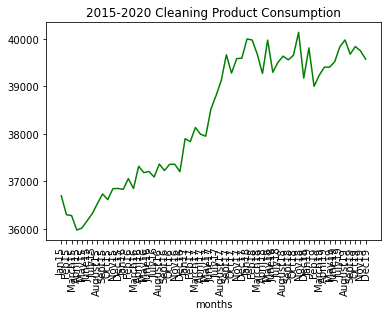

In [10]:
#Cleaning Prodcuts 2015-2019
cleaningproduct15_19 = plt.plot(allmonths, graph_necessities_df.loc['Household cleaning products', :], color="green", label="Cleaning Product Consumption")

plt.title("2015-2020 Cleaning Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

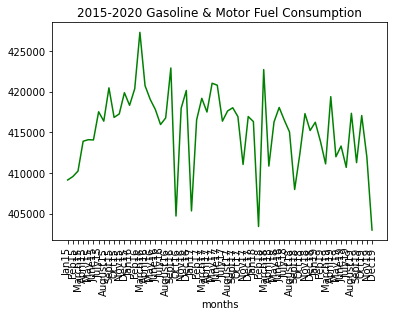

In [11]:
# Gasoline & Motor Fuel 2015-2019

gasoline15_19 = plt.plot(allmonths, graph_necessities_df.loc['Gasoline and other motor fuel', :], color="green", label="Gasosline Consumption")

plt.title("2015-2020 Gasoline & Motor Fuel Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

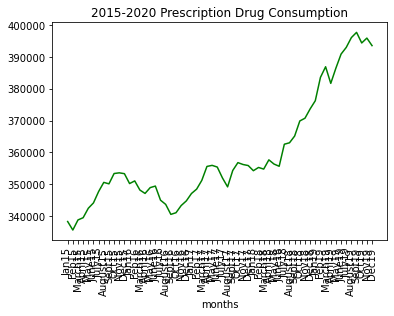

In [12]:
#Prescription Drugs 2015-2019
prescription15_19 = plt.plot(allmonths, graph_necessities_df.loc['Prescription drugs', :], color="green", label="Prescription Drugs")

plt.title("2015-2020 Prescription Drug Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

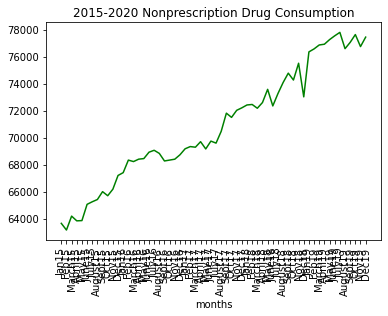

In [13]:
# Nonprescription Drug 2015-2019

nonprescription15_19 = plt.plot(allmonths, graph_necessities_df.loc['Nonprescription drugs', :], color="green", label="Nonprescription Drugs")

plt.title("2015-2020 Nonprescription Drug Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

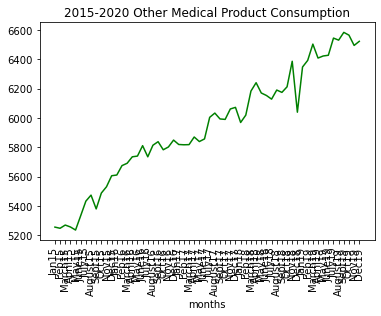

In [14]:
# Other Medical 2015-2019

othermedical15_19 = plt.plot(allmonths, graph_necessities_df.loc['Other medical products', :], color="green", label="Other Medical Products Consumption")

plt.title("2015-2020 Other Medical Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

In [15]:
annualtotal_df = pd.DataFrame({
    'Category': necessities['Consumption Category '],
    '2015 Total': necessities15['Total'],
    '2016 Total': necessities16['Total'],
    '2017 Total': necessities17['Total'],
    '2018 Total': necessities18['Total'],
    '2019 Total': necessities19['Total']
})

annual_df = annualtotal_df.set_index('Category')

years = annual_df.keys()
years = ["2015","2016","2017","2018","2019"]

annual_df

,2015 Total,2016 Total,2017 Total,2018 Total,2019 Total
Category,,,,,
Gasoline and other motor fuel,4979314,5021915,4997268,4971962,4957253
Lubricants and fluids,87977,83281,85927,91099,90573
Fuel oil,318503,313603,301485,285773,277724
Other fuels,21513,17959,18339,20133,19343
Prescription drugs,4147739,4153517,4238247,4339078,4676210
Nonprescription drugs,779596,821474,844103,880575,924834
Other medical products,64525,69096,71185,73875,77748
Household cleaning products,437364,446074,464378,475839,475004
Household paper products,436878,443705,455442,465018,458466


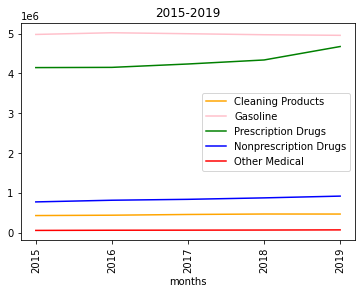

In [16]:
# 2015-2019 Annual Total Cleaning Product Consumption Comparison

cleaningproducts = plt.plot(years, annual_df.loc['Household cleaning products',['2015 Total', '2016 Total',
                                    '2017 Total', '2018 Total', '2019 Total']], color="orange", label="Cleaning Products")

gasoline = plt.plot(years, annual_df.loc['Gasoline and other motor fuel',['2015 Total', '2016 Total', 
                                    '2017 Total', '2018 Total', '2019 Total']], color="pink", label="Gasoline")

prescription = plt.plot(years, annual_df.loc['Prescription drugs',['2015 Total', '2016 Total',
                                    '2017 Total', '2018 Total', '2019 Total']], color="green", label="Prescription Drugs")

nonprescription = plt.plot(years, annual_df.loc['Nonprescription drugs',['2015 Total', '2016 Total',
                                    '2017 Total', '2018 Total', '2019 Total']], color="blue", label="Nonprescription Drugs")

othermedical = plt.plot(years, annual_df.loc['Other medical products',['2015 Total', '2016 Total',
                                    '2017 Total', '2018 Total', '2019 Total']], color="red", label="Other Medical")

plt.legend(['Cleaning Products', 'Gasoline', 'Prescription Drugs', 'Nonprescription Drugs', 'Other Medical'], loc="best")
plt.title("2015-2019")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

In [17]:
graph15_df = graph_necessities_df[['2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10','2015M11', '2015M12']]
months = graph15_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept","Oct","Nov","Dec"]

graph16_df = graph_necessities_df[['2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10','2016M11', '2016M12']]
months = graph16_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept","Oct","Nov","Dec"]

graph17_df = graph_necessities_df[['2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10', '2017M11', '2017M12']]
months = graph17_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept","Oct","Nov","Dec"]

graph18_df = graph_necessities_df[['2018M01', '2018M02', '2018M03', '2018M04',
        '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10','2018M11', '2018M12']]
months = graph18_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept","Oct","Nov","Dec"]

graph19_df = graph_necessities_df[['2019M01', '2019M02', '2019M03', '2019M04',
        '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10','2019M11', '2019M12']]
months = graph19_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept","Oct","Nov","Dec"]



In [18]:
necessities.columns

Index(['Consumption Category ', '2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10',
       '2015M11', '2015M12', '2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10',
       '2016M11', '2016M12', '2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10',
       '2017M11', '2017M12', '2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10',
       '2018M11', '2018M12', '2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10',
       '2019M11', '2019M12', '2020M01', '2020M02', '2020M03', '2020M04',
       '2020M05', '2020M06', '2020M07', '2020M08', '2020M09'],
      dtype='object')

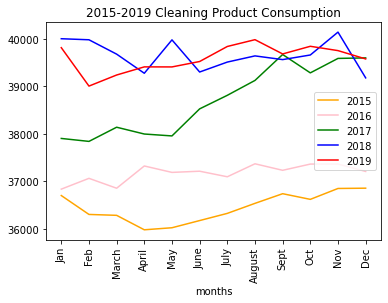

In [19]:
# 2015-2019 Cleaning Product Consumption Comparison

cleaningproduct15 = plt.plot(months, graph15_df.loc['Household cleaning products', :], color="orange", label="2015")

cleaningproduct16 = plt.plot(months, graph16_df.loc['Household cleaning products', :], color="pink", label="2016")

cleaningproduct17 = plt.plot(months, graph17_df.loc['Household cleaning products', :], color="green", label="2017")

cleaningproduct18 = plt.plot(months, graph18_df.loc['Household cleaning products', :], color="blue", label="2018")

cleaningproduct19 = plt.plot(months, graph19_df.loc['Household cleaning products', :], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019], loc="best")
plt.title("2015-2019 Cleaning Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

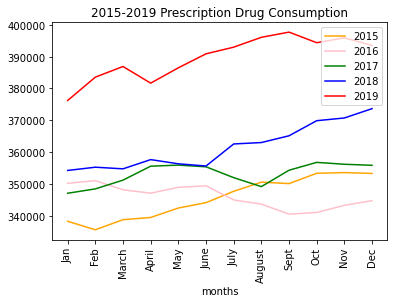

In [20]:
# 2015-2019 Prescription Drugs Consumption Comparison

prescription15 = plt.plot(months, graph15_df.loc['Prescription drugs',['2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10',
       '2015M11', '2015M12']], color="orange", label="2015")

prescription16 = plt.plot(months, graph16_df.loc['Prescription drugs',['2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10',
       '2016M11', '2016M12']], color="pink", label="2016")

prescription17 = plt.plot(months, graph17_df.loc['Prescription drugs',['2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10',
       '2017M11', '2017M12']], color="green", label="2017")

prescription18 = plt.plot(months, graph18_df.loc['Prescription drugs',['2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10',
       '2018M11', '2018M12']], color="blue", label="2018")

prescription19 = plt.plot(months, graph19_df.loc['Prescription drugs',['2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10',
       '2019M11', '2019M12']], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019], loc="best")
plt.title("2015-2019 Prescription Drug Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

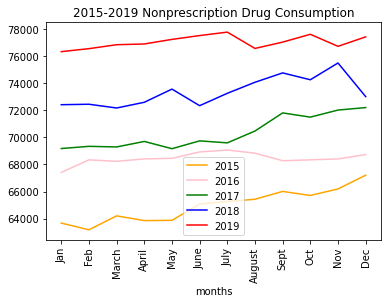

In [21]:
# 2015-2019 Nonprescription Drugs Consumption Comparison

nonprescription15 = plt.plot(months, graph15_df.loc['Nonprescription drugs',['2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10',
       '2015M11', '2015M12']], color="orange", label="2015")

nonprescription16 = plt.plot(months, graph16_df.loc['Nonprescription drugs',['2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10',
       '2016M11', '2016M12']], color="pink", label="2016")

nonprescription17 = plt.plot(months, graph17_df.loc['Nonprescription drugs',['2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10',
       '2017M11', '2017M12']], color="green", label="2017")

nonprescription18 = plt.plot(months, graph18_df.loc['Nonprescription drugs',['2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10',
       '2018M11', '2018M12']], color="blue", label="2018")

nonprescription19 = plt.plot(months, graph19_df.loc['Nonprescription drugs',['2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10',
       '2019M11', '2019M12']], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019], loc="best")
plt.title("2015-2019 Nonprescription Drug Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

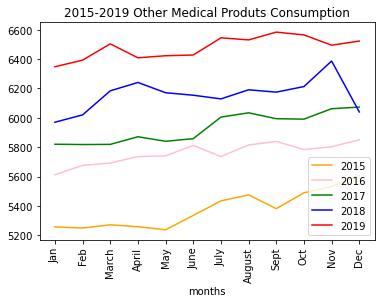

In [22]:
# 2015-2019 Other Medical Product Consumption Comparison

othermedicalproduct15 = plt.plot(months, graph15_df.loc['Other medical products',['2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10',
       '2015M11', '2015M12']], color="orange", label="2015")

othermedicalproduct16 = plt.plot(months, graph16_df.loc['Other medical products',['2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10',
       '2016M11', '2016M12']], color="pink", label="2016")

othermedicalproduct17 = plt.plot(months, graph17_df.loc['Other medical products',['2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10',
       '2017M11', '2017M12']], color="green", label="2017")

othermedicalproduct18 = plt.plot(months, graph18_df.loc['Other medical products',['2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10',
       '2018M11', '2018M12']], color="blue", label="2018")

othermedicalproduct19 = plt.plot(months, graph19_df.loc['Other medical products',['2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10',
       '2019M11', '2019M12']], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019], loc="best")
plt.title("2015-2019 Other Medical Produts Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

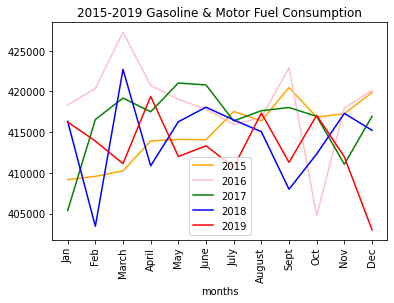

In [23]:
# 2015-2019 Gasoline & Motor Fuel Consumption Comparison

gasoline15 = plt.plot(months, graph15_df.loc['Gasoline and other motor fuel',['2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10',
       '2015M11', '2015M12']], color="orange", label="2015")

gasoline16 = plt.plot(months, graph16_df.loc['Gasoline and other motor fuel',['2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10',
       '2016M11', '2016M12']], color="pink", label="2016")

gasoline17 = plt.plot(months, graph17_df.loc['Gasoline and other motor fuel',['2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10',
       '2017M11', '2017M12']], color="green", label="2017")

gasoline18 = plt.plot(months, graph18_df.loc['Gasoline and other motor fuel',['2018M01', '2018M02', '2018M03', '2018M04',
       '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10',
       '2018M11', '2018M12']], color="blue", label="2018")

gasoline19 = plt.plot(months, graph19_df.loc['Gasoline and other motor fuel',['2019M01', '2019M02', '2019M03', '2019M04',
       '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10',
       '2019M11', '2019M12']], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019], loc="best")
plt.title("2015-2019 Gasoline & Motor Fuel Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

In [29]:
# 2015 - 2020 Analysis (Jan-Sept)

necessities20 = necessities.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04',
       '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]

necessities20

graph_necessities20 = necessities20.set_index('Consumption Category ')
graph_necessities20


,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Consumption Category,,,,,,,,,
Gasoline and other motor fuel,414196,412515,348239,258098,312138,352503,363811,369140,374007
Lubricants and fluids,7555,7541,6383,4743,5721,6446,6656,6742,6831
Fuel oil,19725,21692,23366,27167,30496,27746,26913,26182,28497
Other fuels,1428,1438,1347,1361,1418,1388,1398,1425,1479
Prescription drugs,397892,404197,429613,392311,396323,404648,408873,412429,417457
Nonprescription drugs,78626,79126,85388,76229,79927,82875,85731,84330,84740
Other medical products,6612,6614,6215,5233,5800,6284,6791,6945,7151
Household cleaning products,39791,40017,46227,40557,42437,42594,41637,41494,41810
Household paper products,38042,37937,44706,37601,39052,39452,37998,37965,39656


In [30]:
graph15_df = graph_necessities_df[['2015M01', '2015M02', '2015M03', '2015M04',
       '2015M05', '2015M06', '2015M07', '2015M08', '2015M09']]
months = graph15_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph16_df = graph_necessities_df[['2016M01', '2016M02', '2016M03', '2016M04',
       '2016M05', '2016M06', '2016M07', '2016M08', '2016M09']]
months = graph16_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph17_df = graph_necessities_df[['2017M01', '2017M02', '2017M03', '2017M04',
       '2017M05', '2017M06', '2017M07', '2017M08', '2017M09']]
months = graph17_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph18_df = graph_necessities_df[['2018M01', '2018M02', '2018M03', '2018M04',
        '2018M05', '2018M06', '2018M07', '2018M08', '2018M09']]
months = graph18_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph19_df = graph_necessities_df[['2019M01', '2019M02', '2019M03', '2019M04',
        '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
months = graph19_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph20_df = graph_necessities20[['2020M01', '2020M02', '2020M03', '2020M04',
       '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
months = graph20_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

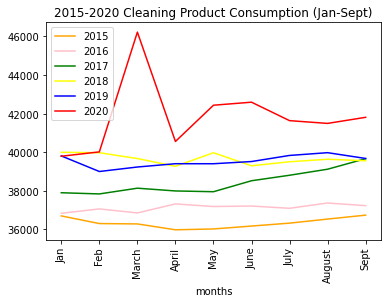

In [31]:
# 2015-2020 (Jan-Sept) Cleaning Product Consumption Comparison

cleaningproduct15 = plt.plot(months, graph15_df.loc['Household cleaning products', :], color="orange", label="2015")

cleaningproduct16 = plt.plot(months, graph16_df.loc['Household cleaning products', :], color="pink", label="2016")

cleaningproduct17 = plt.plot(months, graph17_df.loc['Household cleaning products', :], color="green", label="2017")

cleaningproduct18 = plt.plot(months, graph18_df.loc['Household cleaning products', :], color="yellow", label="2018")

cleaningproduct19 = plt.plot(months, graph19_df.loc['Household cleaning products', :], color="blue", label="2019")

cleaningproduct20 = plt.plot(months, graph20_df.loc['Household cleaning products', :], color="red", label="2020")

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], loc="best")
plt.title("2015-2020 Cleaning Product Consumption (Jan-Sept)")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

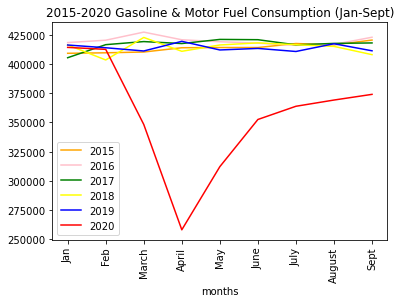

In [34]:
# 2015-2020 (Jan-Sept) Gasoline & Motor Fuel Consumption Comparison

gasoline15 = plt.plot(months, graph15_df.loc['Gasoline and other motor fuel', :], color="orange", label="2015")

gasoline16 = plt.plot(months, graph16_df.loc['Gasoline and other motor fuel', :], color="pink", label="2016")

gasoline17 = plt.plot(months, graph17_df.loc['Gasoline and other motor fuel', :], color="green", label="2017")

gasoline18 = plt.plot(months, graph18_df.loc['Gasoline and other motor fuel', :], color="yellow", label="2018")

gasoline19 = plt.plot(months, graph19_df.loc['Gasoline and other motor fuel', :], color="blue", label="2019")

gasoline20 = plt.plot(months, graph20_df.loc['Gasoline and other motor fuel', :], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], loc="best")
plt.title("2015-2020 Gasoline & Motor Fuel Consumption (Jan-Sept)")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

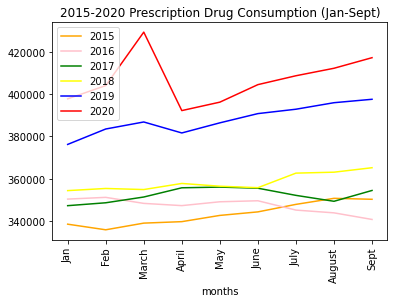

In [35]:
# 2015-2020 (Jan-Sept) Prescription Drug Consumption Comparison

prescription15 = plt.plot(months, graph15_df.loc['Prescription drugs', :], color="orange", label="2015")

prescription16 = plt.plot(months, graph16_df.loc['Prescription drugs', :], color="pink", label="2016")

prescription17 = plt.plot(months, graph17_df.loc['Prescription drugs', :], color="green", label="2017")

prescription18 = plt.plot(months, graph18_df.loc['Prescription drugs', :], color="yellow", label="2018")

prescription19 = plt.plot(months, graph19_df.loc['Prescription drugs', :], color="blue", label="2019")

preceiption20 = plt.plot(months, graph20_df.loc['Prescription drugs', :], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], loc="best")
plt.title("2015-2020 Prescription Drug Consumption (Jan-Sept)")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

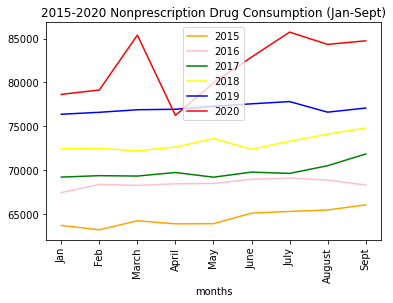

In [36]:
# 2015-2020 (Jan-Sept) Nonprescription Drug Consumption Comparison

nonprescription15 = plt.plot(months, graph15_df.loc['Nonprescription drugs', :], color="orange", label="2015")

nonprescription16 = plt.plot(months, graph16_df.loc['Nonprescription drugs', :], color="pink", label="2016")

nonprescription17 = plt.plot(months, graph17_df.loc['Nonprescription drugs', :], color="green", label="2017")

nonprescription18 = plt.plot(months, graph18_df.loc['Nonprescription drugs', :], color="yellow", label="2018")

nonprescription19 = plt.plot(months, graph19_df.loc['Nonprescription drugs', :], color="blue", label="2019")

nonpreceiption20 = plt.plot(months, graph20_df.loc['Nonprescription drugs', :], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], loc="best")
plt.title("2015-2020 Nonprescription Drug Consumption (Jan-Sept)")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

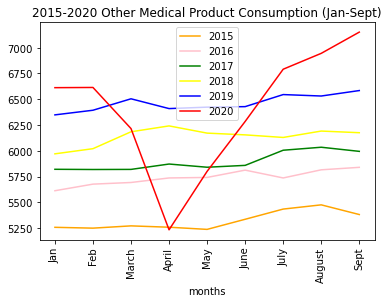

In [37]:
# 2015-2020 (Jan-Sept) Other Medical Products Consumption Comparison

othermed15 = plt.plot(months, graph15_df.loc['Other medical products', :], color="orange", label="2015")

othermed16 = plt.plot(months, graph16_df.loc['Other medical products', :], color="pink", label="2016")

othermed17 = plt.plot(months, graph17_df.loc['Other medical products', :], color="green", label="2017")

othermed18 = plt.plot(months, graph18_df.loc['Other medical products', :], color="yellow", label="2018")

othermed19 = plt.plot(months, graph19_df.loc['Other medical products', :], color="blue", label="2019")

othermed20 = plt.plot(months, graph20_df.loc['Other medical products', :], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], loc="best")
plt.title("2015-2020 Other Medical Product Consumption (Jan-Sept)")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()

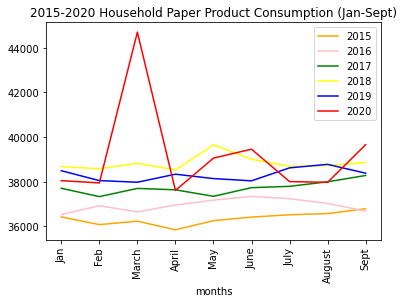

In [38]:
# 2015-2020 (Jan-Sept) Household Paper Product Consumption Comparison

paper15 = plt.plot(months, graph15_df.loc['Household paper products', :], color="orange", label="2015")

paper16 = plt.plot(months, graph16_df.loc['Household paper products', :], color="pink", label="2016")

paper17 = plt.plot(months, graph17_df.loc['Household paper products', :], color="green", label="2017")

paper18 = plt.plot(months, graph18_df.loc['Household paper products', :], color="yellow", label="2018")

paper19 = plt.plot(months, graph19_df.loc['Household paper products', :], color="blue", label="2019")

paper20 = plt.plot(months, graph20_df.loc['Household paper products', :], color="red", label="2019")

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], loc="best")
plt.title("2015-2020 Household Paper Product Consumption (Jan-Sept)")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.show()